In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [18]:
data = pd.read_pickle('data\processed datasets\diginetica\interactions_full.pkl')

In [19]:
data

,Type,SessionId,ItemId,Time,Date,Datestamp,TimeO,ItemSupport
3,view,1,9654,1.462752e+09,2016-05-09,1.462752e+09,2016-05-09 00:01:15.848000+00:00,74
5,view,1,33043,1.462752e+09,2016-05-09,1.462752e+09,2016-05-09 00:02:53.912000+00:00,41
2,view,1,32118,1.462752e+09,2016-05-09,1.462752e+09,2016-05-09 00:04:03.569000+00:00,19
6,view,1,12352,1.462752e+09,2016-05-09,1.462752e+09,2016-05-09 00:05:29.870000+00:00,79
7,view,1,35077,1.462752e+09,2016-05-09,1.462752e+09,2016-05-09 00:06:30.072000+00:00,47
...,...,...,...,...,...,...,...,...
1235353,view,600672,8141,1.463098e+09,2016-05-13,1.463098e+09,2016-05-13 00:00:25.615000+00:00,38
1235354,view,600672,22587,1.463098e+09,2016-05-13,1.463098e+09,2016-05-13 00:00:27.568000+00:00,92
1235357,view,600674,106930,1.464307e+09,2016-05-27,1.464307e+09,2016-05-27 00:00:53.456000+00:00,40
1235355,view,600674,1152,1.464307e+09,2016-05-27,1.464307e+09,2016-05-27 00:01:24.848000+00:00,35


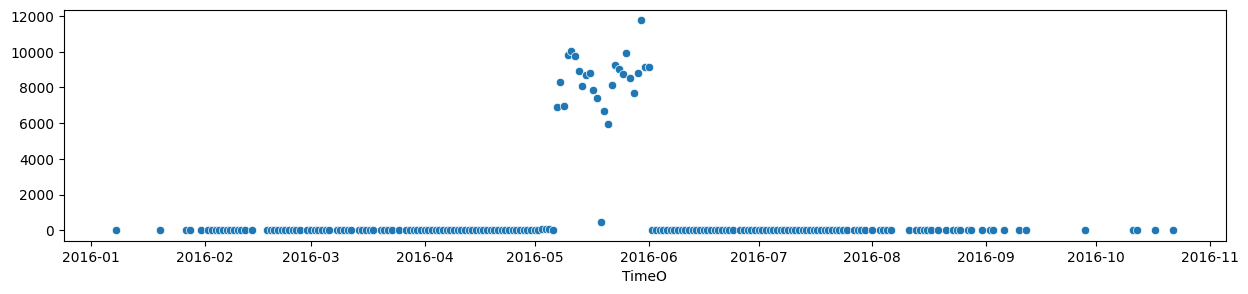

In [20]:
# how many events are there per day?
events_per_day = data.groupby(data.TimeO.dt.date).size()

sns.scatterplot(data=events_per_day)
# change size of plot
plt.gcf().set_size_inches(15, 3)

As can be seen in the plot above, most interactions occur in may and june 2016. This large difference in number of interactions per day won't be a problem for the model, as the model will be trained on the entire dataset. However, it is important to keep in mind that the model will be trained on data from a specific period, which might not be representative for the entire dataset.

How many cold start sessions are there in the dataset?  
Lets create a histogram with the frequency of the length of the sessions.

Text(5.019520963089914, 12000, 'Mean = 4.52')

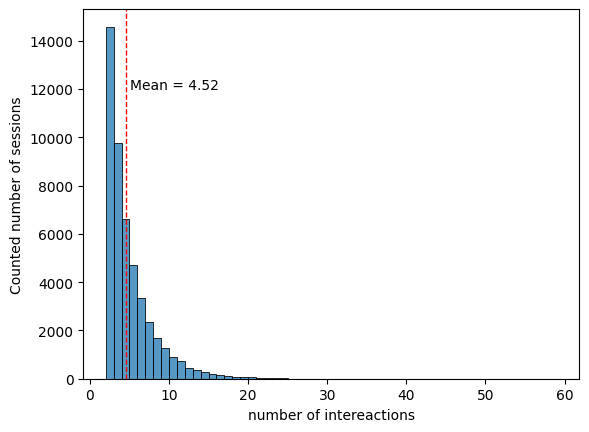

In [21]:
data_per_session = data.groupby('SessionId').size().reset_index(name='number of intereactions')

sns.histplot(data_per_session['number of intereactions'], binwidth=1)
plt.ylabel('Counted number of sessions')

# add a line for the mean
plt.axvline(data_per_session['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)
# print the mean
plt.text(data_per_session['number of intereactions'].mean() + 0.5, 12000, 'Mean = {:.2f}'.format(data_per_session['number of intereactions'].mean()))

On average, 4.52 interactions are made per session. This is a relatively low number of interactions per session and indicates that the dataset is sparse and that the dataset contains many cold user start sessions.  

How are the interactions distributed over the items? Does one item dominate the dataset? or are the interactions spread out over the items?

'top 10 most popular items:'

,ItemId,number of intereactions
6869,42271,308
13548,375888,302
14064,379023,279
6513,36956,266
6240,36031,263
12094,164627,262
11969,161039,260
8047,58581,254
12509,176018,252
4434,22894,251


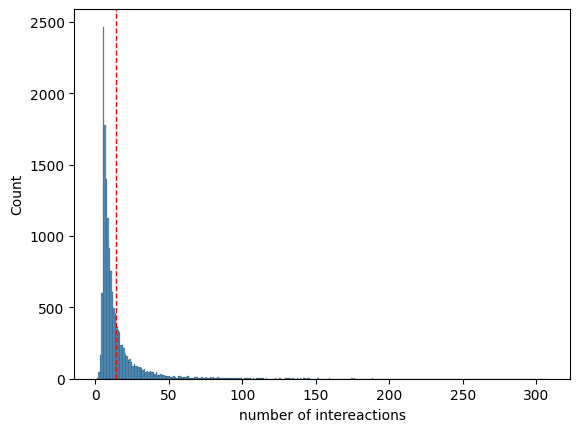

In [22]:
data_per_item = data.groupby('ItemId').size().reset_index(name='number of intereactions').sort_values('number of intereactions', ascending=False)
sns.histplot(data_per_item['number of intereactions'], binwidth=1)

# add a line for the mean
plt.axvline(data_per_item['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)

display('top 10 most popular items:')
display(data_per_item.head(10))

In the above histogram and top 10 table, we can see that some items are very popular and have been interacted with many times, while most items have been interacted with only a few times. This is a typical characteristic of e-commerce datasets. And the cold item start is visible in the histogram.

Do items get to be interacted with more as time goes on? And how are the interactions distributed over time?

In [23]:
# create a dataframe where we track the first and last time an item was interacted with by taking the min and max of the Time column for each item. also count the number of interactions per item
data_per_item = data.groupby('ItemId').agg({'TimeO': ['min', 'max', 'count']}).reset_index()

# compute the time between the first and last interaction for each item
data_per_item['time between first and last interaction'] = data_per_item['TimeO']['max'] - data_per_item['TimeO']['min']
data_per_item


ItemId                            TimeO  \
                                           min   
0           2 2016-05-08 00:05:25.902000+00:00   
1           3 2016-05-07 00:18:53.958000+00:00   
2           6 2016-05-15 00:12:26.256000+00:00   
3           7 2016-05-11 00:04:09.608000+00:00   
4           9 2016-05-07 00:04:50.490000+00:00   
...       ...                              ...   
15115  506446 2016-05-30 00:07:54.082000+00:00   
15116  512539 2016-05-21 00:08:08.736000+00:00   
15117  539560 2016-05-23 00:11:31.996000+00:00   
15118  568637 2016-05-12 00:04:14.624000+00:00   
15119  707327 2016-05-24 00:03:44.003000+00:00   

                                              \
                                   max count   
0     2016-05-31 00:08:58.230000+00:00    14   
1     2016-05-16 00:16:38.776000+00:00     9   
2     2016-06-01 00:00:09.009000+00:00     6   
3     2016-06-01 00:03:15.360000+00:00    20   
4     2016-05-28 00:15:55.803000+00:00    13   
...                                ...   ...   
15115 2016-05-30 00:18:03.248000+00:00     7   
15116 2016-05-31 00:02:30.799000+00:00     8   
15117 2016-05-28 00:03:32.418000+00:00     6   
15118 2016-06-01 00:14:14.369000+00:00    16   
15119 2016-05-30 00:02:29.435000+00:00     5   

      time between first and last interaction  
                                               
0                     23 days 00:03:32.328000  
1                      8 days 23:57:44.818000  
2                     16 days 23:47:42.753000  
3                     20 days 23:59:05.752000  
4                     21 days 00:11:05.313000  
...                                       ...  
15115                  0 days 00:10:09.166000  
15116                  9 days 23:54:22.063000  
15117                  4 days 23:52:00.422000  
15118                 20 days 00:09:59.745000  
15119                  5 days 23:58:45.432000  

[15120 rows x 5 columns]

<Axes: xlabel='time between first and last interaction', ylabel='Count'>

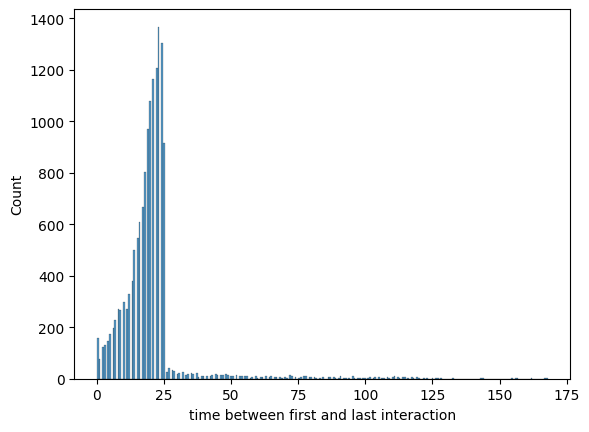

In [24]:
# create a boxplot of the distribution of the time between the first and last interaction for each item
sns.histplot(x=data_per_item['time between first and last interaction'].dt.days) 

The above histogram shows that most of the products are interected with up to 25 days. Only a few products are interacted with for more than 25 days. This makes sense as most interactions are made in may and june 2016. Lets add the month column to the dataset and see how the interactions are distributed over the months.

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first strip plot on the first subplot
sns.stripplot(x=data_per_item['First month interaction'], 
              y=data_per_item['time between first and last interaction'].dt.days,
              jitter=0.3,
              ax=axes[0])

# Set the title and labels for the first subplot
axes[0].set_title('First Month Interaction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Time Between First and Last Interaction (Days)')

# Plot the second strip plot on the second subplot
sns.stripplot(x=data_per_item['Last month interaction'], 
              y=data_per_item['time between first and last interaction'].dt.days,
              jitter=0.3,
              ax=axes[1])

# Set the title and labels for the second subplot
axes[1].set_title('Last Month Interaction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Time Between First and Last Interaction (Days)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


May and June are the most popular months for interactions, or at least the months with the most interactions in the dataset. The dataset is not balanced over months and this might be a problem for the model. The model will be trained on data from a specific period, which might not be representative for the entire dataset. This is something to keep in mind when interpreting the results of the model.